### Python packages used in this code

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import pickle
import sklearn
import platform
import sys
import seaborn as sns

%matplotlib inline

In [2]:
"""
Environments

--Platform--
OS : Windows-10-10.0.19044-SP0
--Version--
python :  3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
numpy : 1.23.1
pandas : 1.4.3
seaborn : 0.11.2
"""

print('--Platform--')
print('OS :', platform.platform())
print('--Version--')
print('python : ', sys.version)
print('numpy :', np.__version__)
print('pandas :', pd.__version__)
print('seaborn :', sns.__version__)

--Platform--
OS : Windows-10-10.0.19044-SP0
--Version--
python :  3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
numpy : 1.23.1
pandas : 1.4.3
seaborn : 0.11.2


# Preparation

## Create output directories

In [3]:
if not os.path.isdir('../30_Output/20_Plot/400_MakeResult'):
    os.makedirs('../30_Output/20_Plot/400_MakeResult')

# Main codes

## Load data

In [4]:
df_result = pd.read_csv('../30_Output/30_csv/100_CheckEigenvalues/100_Results.csv', index_col=0)
df_result

,kernel_x,kernel_xs,BasisDupl,itr,s_xs,s_x,s_xxs
linear-linear-b0-i0,linear,linear,0.0,0.0,0.526936,0.491599,0.610782
linear-linear-b0-i1,linear,linear,0.0,1.0,0.519889,0.554079,0.635298
linear-linear-b0-i2,linear,linear,0.0,2.0,0.507749,0.531477,0.614047
linear-linear-b0-i3,linear,linear,0.0,3.0,0.518265,0.523278,0.631595
linear-linear-b0-i4,linear,linear,0.0,4.0,0.505229,0.514020,0.621642
...,...,...,...,...,...,...,...
inf-inf-b10-i95,inf,inf,10.0,95.0,0.587665,0.586826,0.722625
inf-inf-b10-i96,inf,inf,10.0,96.0,0.576419,0.593158,0.701968
inf-inf-b10-i97,inf,inf,10.0,97.0,0.589129,0.581659,0.710102
inf-inf-b10-i98,inf,inf,10.0,98.0,0.592446,0.587239,0.713123


## Plot

In [5]:
plot_list = [
    {'kernel_x':'linear', 'kernel_xs':'linear', 'loc':1},
    {'kernel_x':'linear', 'kernel_xs':str(0.5), 'loc':2},
    {'kernel_x':'linear', 'kernel_xs':str(1.5), 'loc':3},
    {'kernel_x':'linear', 'kernel_xs':str(2.5), 'loc':4},
    {'kernel_x':'linear', 'kernel_xs':str(np.inf), 'loc':5},
    {'kernel_x':str(0.5), 'kernel_xs':'linear', 'loc':6},
    {'kernel_x':str(0.5), 'kernel_xs':str(0.5), 'loc':7},
    {'kernel_x':str(0.5), 'kernel_xs':str(1.5), 'loc':8},
    {'kernel_x':str(0.5), 'kernel_xs':str(2.5), 'loc':9},
    {'kernel_x':str(0.5), 'kernel_xs':str(np.inf), 'loc':10},
    {'kernel_x':str(1.5), 'kernel_xs':'linear', 'loc':11},
    {'kernel_x':str(1.5), 'kernel_xs':str(0.5), 'loc':12},
    {'kernel_x':str(1.5), 'kernel_xs':str(1.5), 'loc':13},
    {'kernel_x':str(1.5), 'kernel_xs':str(2.5), 'loc':14},
    {'kernel_x':str(1.5), 'kernel_xs':str(np.inf), 'loc':15},
    {'kernel_x':str(2.5), 'kernel_xs':'linear', 'loc':16},
    {'kernel_x':str(2.5), 'kernel_xs':str(0.5), 'loc':17},
    {'kernel_x':str(2.5), 'kernel_xs':str(1.5), 'loc':18},
    {'kernel_x':str(2.5), 'kernel_xs':str(2.5), 'loc':19},
    {'kernel_x':str(2.5), 'kernel_xs':str(np.inf), 'loc':20},
    {'kernel_x':str(np.inf), 'kernel_xs':'linear', 'loc':21},
    {'kernel_x':str(np.inf), 'kernel_xs':str(0.5), 'loc':22},
    {'kernel_x':str(np.inf), 'kernel_xs':str(1.5), 'loc':23},
    {'kernel_x':str(np.inf), 'kernel_xs':str(2.5), 'loc':24},
    {'kernel_x':str(np.inf), 'kernel_xs':str(np.inf), 'loc':25}
]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


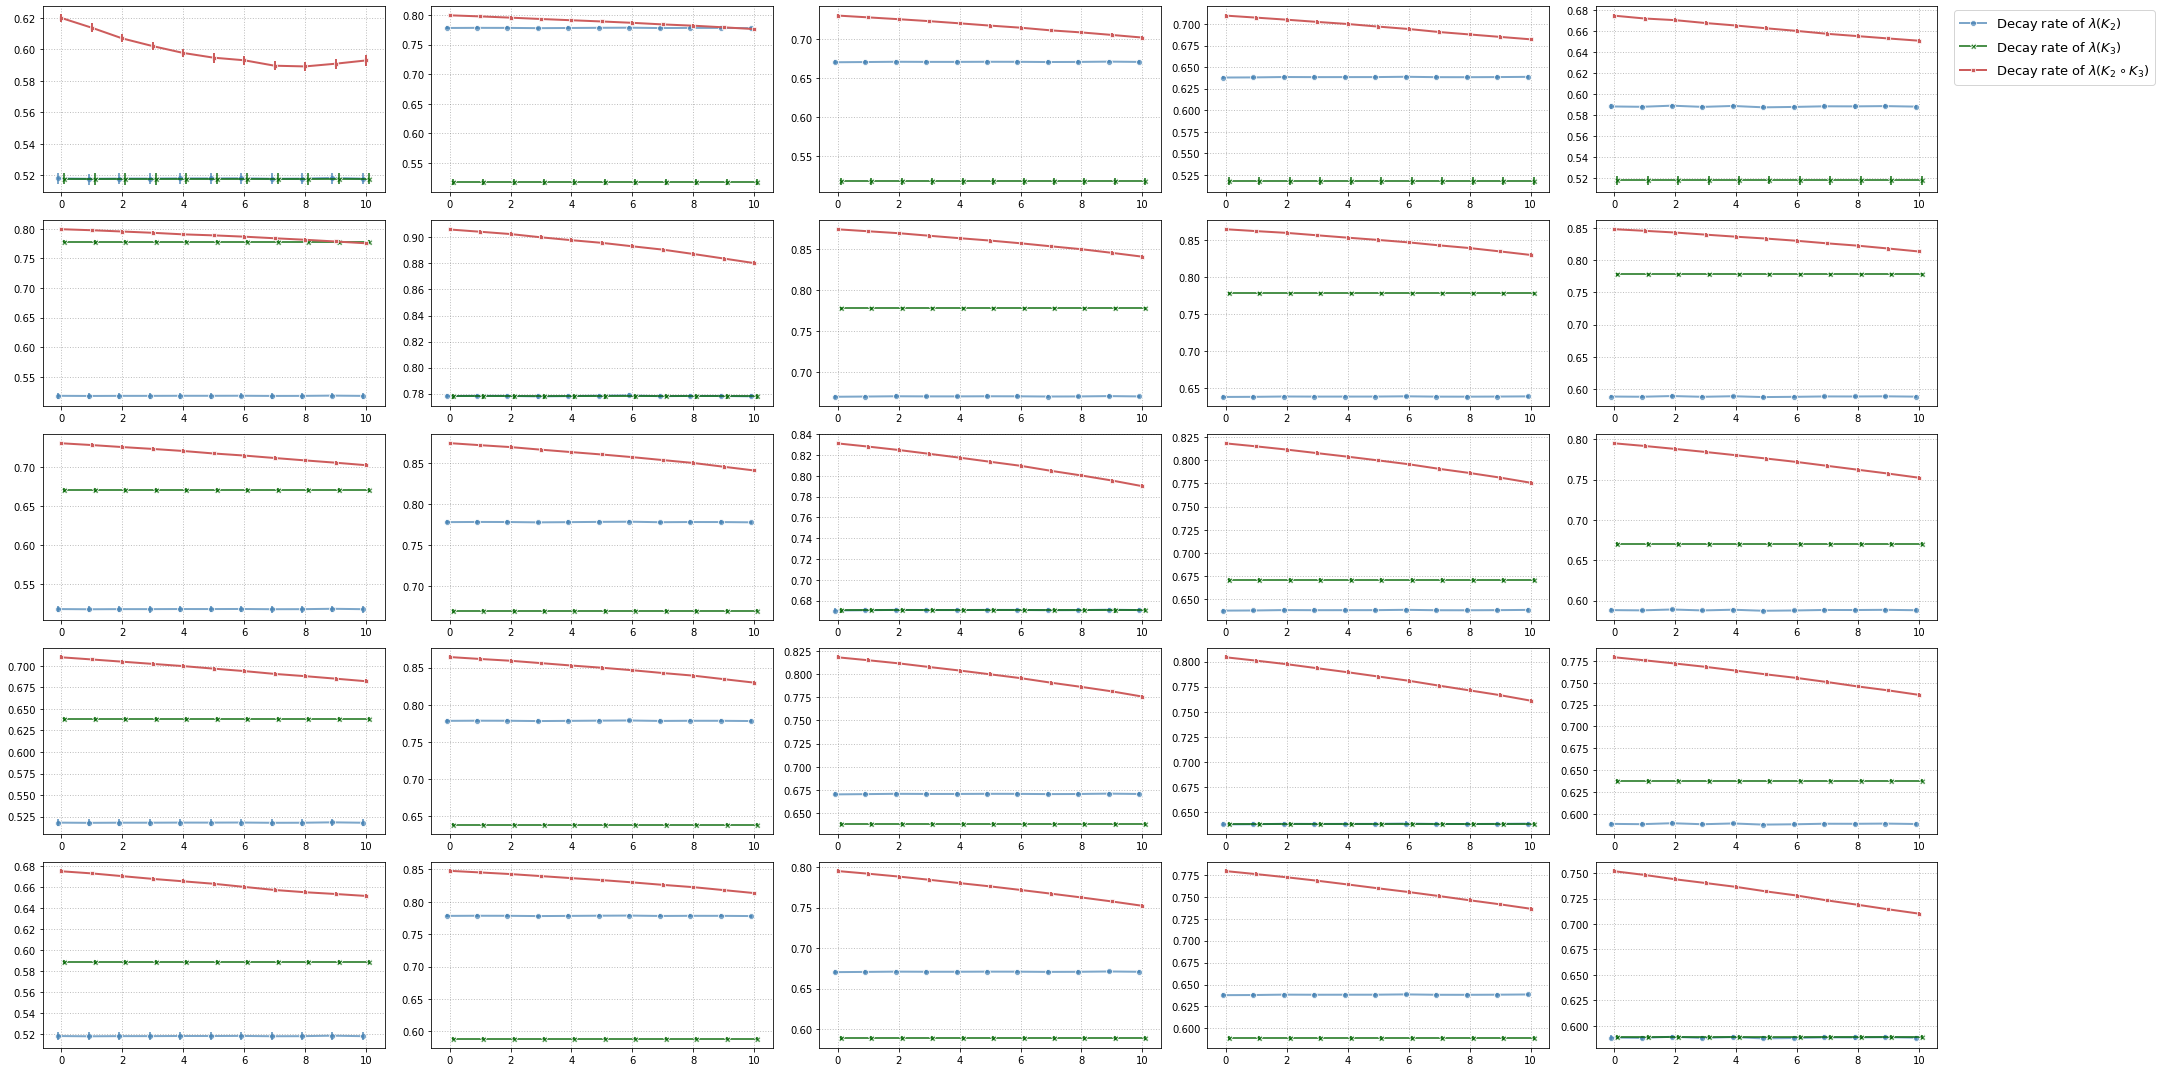

In [6]:
fig = plt.figure(figsize=(30,15))
# Loop for subplots
for i_plt in range(len(plot_list)):
    print(plot_list[i_plt]['loc'])
    
    df_result_tmp = df_result[(df_result['kernel_x']==plot_list[i_plt]['kernel_x'])&(df_result['kernel_xs']==plot_list[i_plt]['kernel_xs'])]
    df_melt = df_result_tmp.melt(id_vars=['kernel_x','kernel_xs', 'BasisDupl', 'itr'])
    
    df_melt['Dupl for plot']=0
    # Displace three types of error bars
    for i_loc in df_melt.index:
        if df_melt.loc[[i_loc],['variable']].values=='s_x':
            df_melt.loc[[i_loc], ['Dupl for plot']]=df_melt.loc[[i_loc], ['BasisDupl']].values+0.1
        if df_melt.loc[[i_loc],['variable']].values=='s_xs':
            df_melt.loc[[i_loc], ['Dupl for plot']]=df_melt.loc[[i_loc], ['BasisDupl']].values-0.1
        if df_melt.loc[[i_loc],['variable']].values=='s_xxs':
            df_melt.loc[[i_loc], ['Dupl for plot']]=df_melt.loc[[i_loc], ['BasisDupl']].values
    ax = fig.add_subplot(5, 5, plot_list[i_plt]['loc'])

    snsfig = sns.lineplot(
            data=df_melt, 
            x='Dupl for plot', 
            y='value', 
            hue='variable', 
            markers=True, 
            ci=90, 
            style='variable', 
            err_style='bars', 
            dashes=False, 
            palette=[
                matplotlib.colors.to_rgb('steelblue') + (0.7,),
                matplotlib.colors.to_rgb('darkgreen') + (0.7,),
                matplotlib.colors.to_rgb('indianred') + (1,)
            ], 
            lw=2, 
            err_kws={'lw':2},
            legend=False
        )
    x_lim = snsfig.get_xlim()
    plt.xlim(x_lim)
    plt.xlabel('')
    plt.ylabel('')
    if plot_list[i_plt]['loc']==5:
        plt.legend(['Decay rate of '+r'$\lambda(K_2)$','Decay rate of '+r'$\lambda(K_3)$','Decay rate of '+r'$\lambda(K_2 \circ K_3)$'], bbox_to_anchor=(1.05, 0.98), loc='upper left', borderaxespad=0, fontsize=13)
    plt.grid(color='gray', linestyle='dotted', linewidth=1, alpha=0.5)
plt.tight_layout()
plt.savefig('../30_Output/20_Plot/400_MakeResult/400_Lineplot.pdf')